In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy import stats 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

# 딥러닝 회귀 (파이토치)

In [4]:
df = pd.read_csv("C:/Ai-class/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 결측치 확인 

In [7]:
# 각 열별 결측치 개수 확인
missing_values = df.isnull().sum()

# 결측치 비율(%) 계산
missing_ratio = (df.isnull().sum() / len(df)) * 100

# 결과 출력
missing_df = pd.DataFrame({"결측치 개수": missing_values, "결측치 비율(%)": missing_ratio})
print(missing_df)

                결측치 개수  결측치 비율(%)
id                   0        0.0
Sex                  0        0.0
Length               0        0.0
Diameter             0        0.0
Height               0        0.0
Whole_weight         0        0.0
Shucked_weight       0        0.0
Viscera_weight       0        0.0
Shell_weight         0        0.0
Rings                0        0.0


# 라벨 인코딩

In [21]:
# 레이블 인코더 생성 및 적용
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 상관 관계 행렬 분석

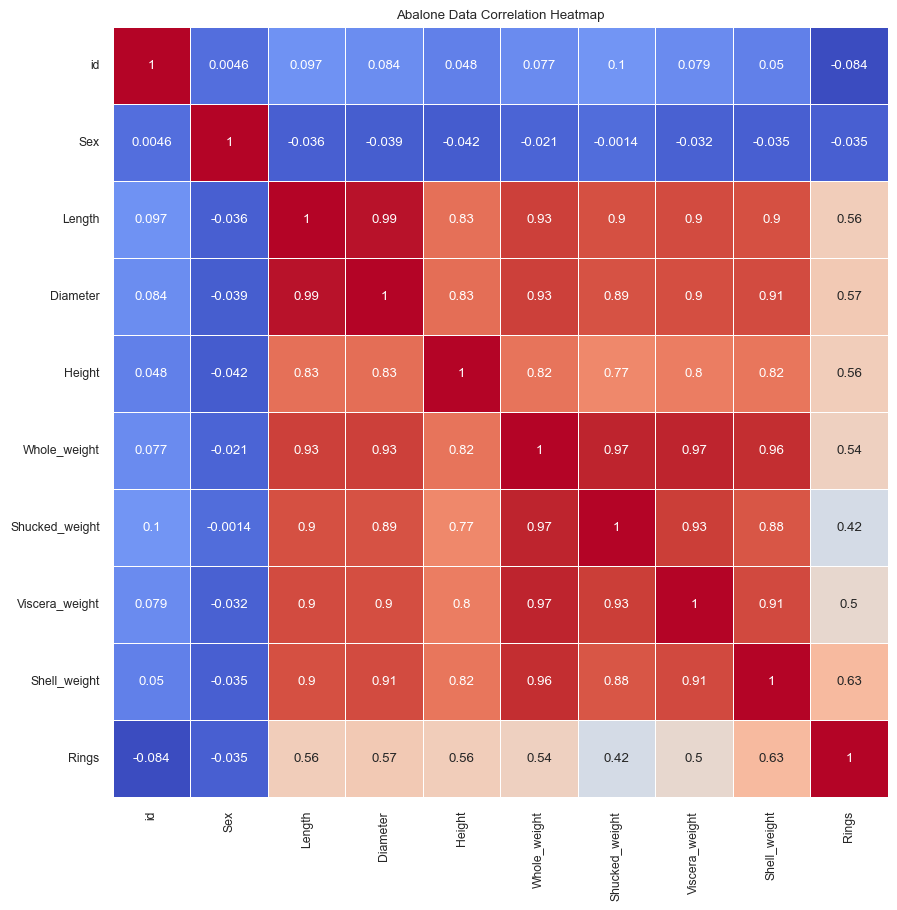

In [23]:
# 상관 관계 행렬 계산
df_corr = df.corr()

# 히트맵 출력
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False, cmap='coolwarm', linewidths=0.5)
plt.title("Abalone Data Correlation Heatmap")
plt.show()

### id, Sex 컬럼 제거

# 불필요한 컬럼 제거 

In [26]:
# 삭제할 칼럼 지정
df.drop(columns=['id', 'Sex'], inplace=True)

# 변경된 데이터프레임 확인
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# X, y 분리

In [29]:
# 입력과 타겟 분리
X = df.drop('Rings', axis=1).values
y = df['Rings'].values.astype(np.float32)

# 데이터 스케일링

In [31]:
# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 훈련, 테스트 데이터 분리

In [36]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 7), (836, 7), (3341,), (836,))

# TensorDataset으로 래핑

In [41]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [43]:
X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape

(torch.Size([3341, 7]),
 torch.Size([836, 7]),
 torch.Size([3341, 1]),
 torch.Size([836, 1]))

# 모델 정의

In [51]:
# 회귀 모델 정의
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RegressionModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# 모델 학습

In [54]:
# 학습 루프
model.train()
for epoch in range(30):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")

print("Training complete.")

Epoch 1, Loss: 69.0988
Epoch 2, Loss: 17.3553
Epoch 3, Loss: 7.8913
Epoch 4, Loss: 6.4670
Epoch 5, Loss: 5.8595
Epoch 6, Loss: 5.4923
Epoch 7, Loss: 5.2544
Epoch 8, Loss: 5.1784
Epoch 9, Loss: 4.9526
Epoch 10, Loss: 4.9052
Epoch 11, Loss: 4.8029
Epoch 12, Loss: 4.6921
Epoch 13, Loss: 4.6939
Epoch 14, Loss: 4.6589
Epoch 15, Loss: 4.6320
Epoch 16, Loss: 4.5594
Epoch 17, Loss: 4.4997
Epoch 18, Loss: 4.5115
Epoch 19, Loss: 4.4694
Epoch 20, Loss: 4.5112
Epoch 21, Loss: 4.4489
Epoch 22, Loss: 4.4236
Epoch 23, Loss: 4.4493
Epoch 24, Loss: 4.4121
Epoch 25, Loss: 4.4000
Epoch 26, Loss: 4.3991
Epoch 27, Loss: 4.3843
Epoch 28, Loss: 4.3521
Epoch 29, Loss: 4.3380
Epoch 30, Loss: 4.3639
Training complete.


# 모델 평가

In [57]:
# 평가
model.eval()
preds, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())

mse = mean_squared_error(actuals, preds)
print(f"Test MSE: {mse:.4f}")

Test MSE: 4.6848


# 시각화

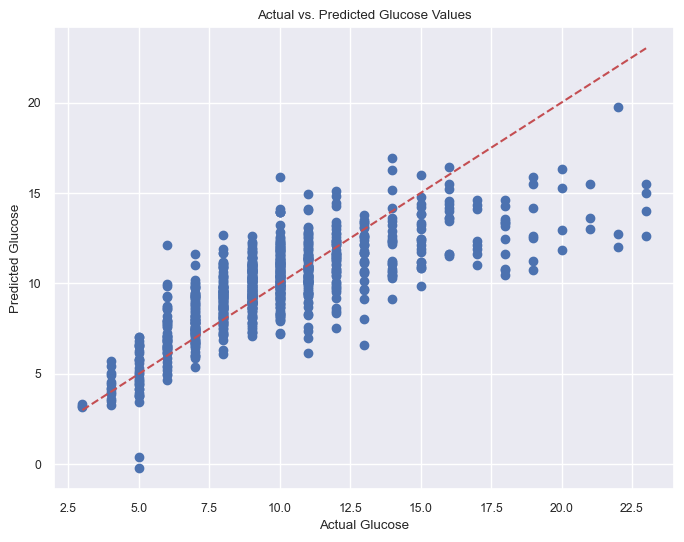

In [60]:
# 시각화 (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(actuals, preds)
plt.xlabel("Actual Glucose")
plt.ylabel("Predicted Glucose")
plt.title("Actual vs. Predicted Glucose Values")
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--')  # y=x line
plt.show()